# COVID DIAGNOSIS PREDICTION

## Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

## Reading the dataset

In [2]:
df = pd.read_csv('C:/Users/Vishal/Downloads/corona_tested_individuals_ver_0083.english.csv')

C:\Users\Vishal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# first few values of dataset
df.head(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
5,2020-11-12,1,0,0,0,0,negative,No,male,Other
6,2020-11-12,1,1,0,0,0,negative,No,male,Other
7,2020-11-12,0,0,0,0,0,negative,No,female,Contact with confirmed
8,2020-11-12,0,0,0,0,0,negative,No,male,Other
9,2020-11-12,1,1,0,0,0,negative,No,male,Other


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [5]:
#checking for columns with NaN values
df.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [6]:
len(df.index)

2742596

In [7]:
#dropping all the rows with NaN values
df.dropna()

#dropping the rows with 'other' values
df = df[df.corona_result != 'other']

In [8]:
#selecting random 1% dataset for our training
df = df.sample(frac = 0.01, random_state = 1)

In [9]:
#categorising the values in form of 0,1 and 2
df['corona_result'] = pd.get_dummies(df['corona_result'], drop_first = True)
df['age_60_and_above'] = pd.get_dummies(df['age_60_and_above'], drop_first = True)
df['gender'] = pd.get_dummies(df['gender'], drop_first = True)
test_ind = pd.get_dummies(df['test_indication'], drop_first = True)
df = pd.concat([df, test_ind], axis = 1)

In [10]:
#dropping the unneccessary columns
df.drop(['test_date', 'test_indication'], axis = 1, inplace = True)

In [11]:
df.head() # checking the dataset

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Contact with confirmed,Other
2171496,0,0,0,0,0,0,0,1,0,1
1159651,0,0,0,0,0,0,0,0,0,1
2492620,0,0,0,0,0,0,0,1,0,1
315193,0,0,0,0,0,0,0,1,0,1
2277417,0,0,0,0,0,0,0,0,0,1


In [12]:
# reseting indexing back from 0
df.reset_index(drop = True, inplace = True)

In [13]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Contact with confirmed,Other
0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1


## Visualising the data

In [32]:
df.groupby("corona_result").size()

corona_result
0    24787
1     2227
dtype: int64

<AxesSubplot:xlabel='corona_result', ylabel='count'>

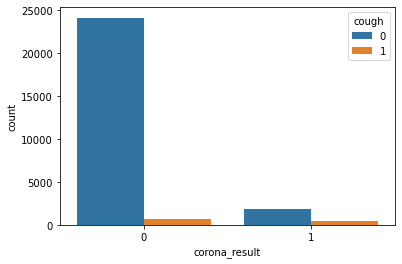

In [16]:
sns.countplot(x = 'corona_result', hue = 'cough', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

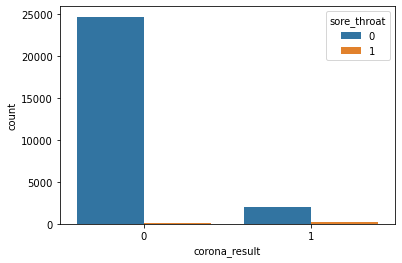

In [17]:
sns.countplot(x = 'corona_result', hue = 'sore_throat', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

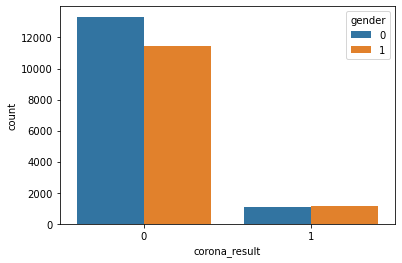

In [18]:
sns.countplot(x = 'corona_result', hue = 'gender', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

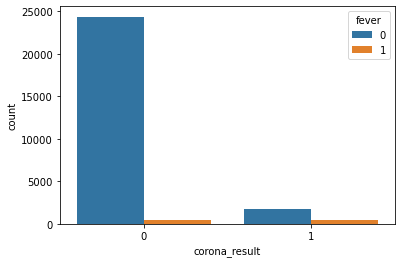

In [19]:
sns.countplot(x = 'corona_result', hue = 'fever', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

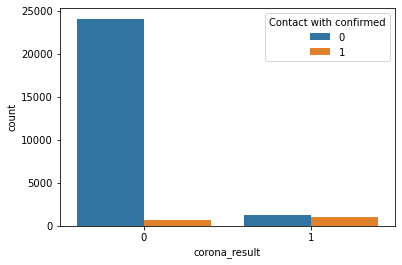

In [20]:
sns.countplot(x = 'corona_result', hue = 'Contact with confirmed', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

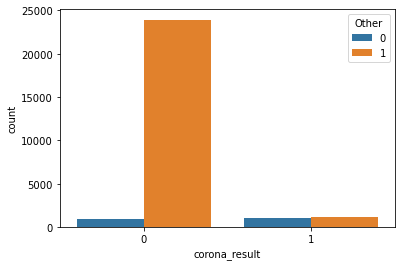

In [33]:
sns.countplot(x = 'corona_result', hue = 'Other', data = df)

## Setting up feature vector and target value

In [21]:
# setting our feature vector
X = df.drop(['corona_result'], axis = 1)

# setting our target value
y = df['corona_result']

In [22]:
# importing libraries to train the model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [23]:
# setting up for svm model
svm_model = svm.SVC(gamma = 'auto', C = 100, kernel = 'rbf')

# preparing our train set and test set
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1)


## Logistic Regression Model

In [24]:
# training our logistic regression model
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

#testing out logistic regression model
pred_y = log_reg.predict(test_x)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4939
           1       0.66      0.31      0.42       464

    accuracy                           0.93      5403
   macro avg       0.80      0.65      0.69      5403
weighted avg       0.91      0.93      0.91      5403



In [26]:
# checking our logistic model accuracy
accuracy_score(pred_y, test_y)


0.9270775495095317

## Support Vector Classifier Model

In [27]:

# training our svm model
svm_model.fit(train_x, train_y)

SVC(C=100, gamma='auto')

In [28]:
# predicting for our test values through svm model
y_pred = svm_model.predict(test_x)

In [29]:
# checking for our svm model accuracy
accuracy_score(y_pred, test_y)

0.9322598556357579

In [30]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize = (5, 5), dpi = 80)
confusion_matrix(test_y, y_pred)

array([[4787,  152],
       [ 214,  250]], dtype=int64)

<Figure size 400x400 with 0 Axes>

In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4939
           1       0.62      0.54      0.58       464

    accuracy                           0.93      5403
   macro avg       0.79      0.75      0.77      5403
weighted avg       0.93      0.93      0.93      5403

